In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [1]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

In [2]:
#create url structure for api calls
base_url = 'http://api.openweathermap.org/data/2.5/weather'
index = 0

#store number of cities so we can print progress as we make api calls
number_of_cities = len(cities)

#add city weather data to a list
city_weather_data = []

#st variable used for troubleshooting
st = 0
print("Beginning Data Processing")


for city in cities:
    #Try to get data for particular city, if not possible print "City Not Found"
    try:
        #build query url
        query_url = base_url + "?q=" + city + "&APPID=" + weather_api_key
        
        #attempt to get a response
        response = requests.get(query_url)
        
        #store json data
        temp_city_json = response.json()
        
        #gather data from json data dictionary and assign to variable for easier referencing when appending to list
        name = temp_city_json['name']
        clouds = temp_city_json['clouds']['all']
        country = temp_city_json['sys']['country']
        dt = temp_city_json['dt']
        humidity = temp_city_json['main']['humidity']
        lon = temp_city_json['coord']['lon']
        lat = temp_city_json['coord']['lat']
        max_temp = temp_city_json['main']['temp_max']
        wind_speed = temp_city_json['wind']['speed']
        
        #append weather data
        city_weather_data.append({"City":  name, "Clouds": clouds, "Country": country, "Date": dt, "Humidity": humidity, "Lon": lon, "Lat": lat, "Max Temp": max_temp, "Wind Speed": wind_speed})
        
        #display progress of api calls
        print("Processing Record " + str(st * 60 + index + 1) + " of " + str(number_of_cities) +   " | " + city)
        
    except:
        
        print("City Not Found")
        
    if index == 59:
        #only 60 api calls allowed per minute. Suspend execution of program for a minute to continue processing. 
        time.sleep(60)
        index = 0
        st+=1
    index += 1

Beginning Data Processing
Processing Record 1 of 593 | avarua
Processing Record 2 of 593 | ushuaia
Processing Record 3 of 593 | mar del plata
Processing Record 4 of 593 | broome
Processing Record 5 of 593 | samarai
City Not Found
Processing Record 7 of 593 | barrow
Processing Record 8 of 593 | codrington
Processing Record 9 of 593 | kaeo
Processing Record 10 of 593 | savelugu
Processing Record 11 of 593 | atuona
Processing Record 12 of 593 | mount gambier
Processing Record 13 of 593 | marfino
City Not Found
City Not Found
City Not Found
Processing Record 17 of 593 | port alfred
Processing Record 18 of 593 | kulhudhuffushi
Processing Record 19 of 593 | rikitea
Processing Record 20 of 593 | hamilton
Processing Record 21 of 593 | mogadishu
Processing Record 22 of 593 | albany
Processing Record 23 of 593 | kidal
Processing Record 24 of 593 | bluff
City Not Found
Processing Record 26 of 593 | jamestown
Processing Record 27 of 593 | cherskiy
Processing Record 28 of 593 | maun
City Not Found


In [4]:
#create dataframe of weather data so we can create CSV file and don't have to re-run code
weather_df = pd.DataFrame(city_weather_data)

In [6]:
#save to csv
weather_df.to_csv("CityWeatherData.csv")

In [5]:
#open CSV
weather_df = pd.read_csv("CityWeatherData.csv")

In [8]:
#review structure of data
weather_df.head()

,Unnamed: 0,City,Clouds,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,0,Avarua,32,CK,1578070725,100,-21.21,-159.78,293.15,0.50
1,1,Ushuaia,40,AR,1578070610,43,-54.81,-68.31,286.15,4.10
2,2,Mar del Plata,79,AR,1578070324,20,-46.43,-67.52,303.89,18.06
3,3,Broome,34,GB,1578070613,86,52.47,1.45,279.26,3.10
4,4,Samarai,86,PG,1578070725,89,-10.62,150.67,297.91,0.86


In [9]:
#get rid of unnecessary index column
cols = ["City", "Clouds", "Country", "Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"]
weather_df = weather_df[cols]

In [18]:
weather_df.head()

#convert temps to farenheit
weather_df["Max Temp"] = ( weather_df["Max Temp"] - 273.15 ) * 9 / 5 + 32

,City,Clouds,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Avarua,32,CK,1578070725,100,-21.21,-159.78,68.000,0.50
1,Ushuaia,40,AR,1578070610,43,-54.81,-68.31,55.400,4.10
2,Mar del Plata,79,AR,1578070324,20,-46.43,-67.52,87.332,18.06
3,Broome,34,GB,1578070613,86,52.47,1.45,42.998,3.10
4,Samarai,86,PG,1578070725,89,-10.62,150.67,76.568,0.86


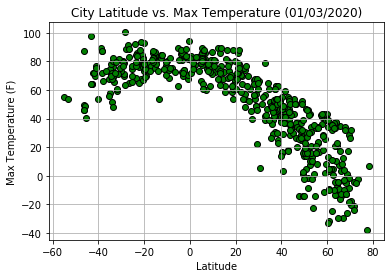

In [32]:
plt.scatter(x = weather_df["Lat"], y = weather_df["Max Temp"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig(fname = "LatvsMaxTemp.png")

## Max temperature appears negatively correlated with latitude > 0. It's currently summer in the southern hemisphere so this pattern might not hold for latitudes less than 0 at this time. Probably this will show the same type of correlation when the southern hemisphere is in winter

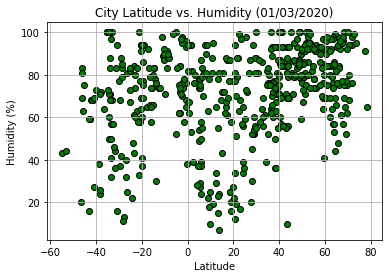

In [33]:
plt.scatter(x = weather_df["Lat"], y = weather_df["Humidity"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Humidity (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig(fname = "LatvsHumidity.png")

## Latitude doesn't seem to have a clear effect on humidity

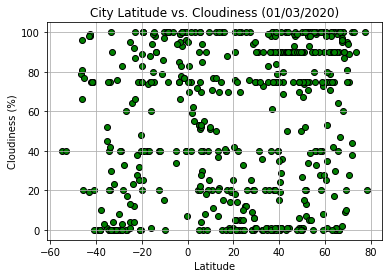

In [34]:
plt.scatter(x = weather_df["Lat"], y = weather_df["Clouds"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Cloudiness (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig(fname = "LatvsCloudiness.png")

## Latitude doesn't seem to have a clear effect on cloudiness

0.7390757514876296

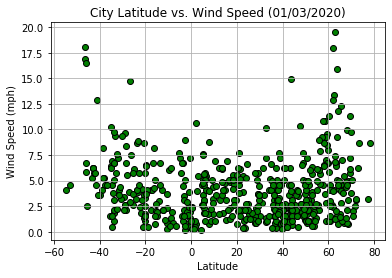

In [74]:
plt.scatter(x = weather_df["Lat"], y = weather_df["Wind Speed"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Wind Speed (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig(fname = "LatvsWindSpeed.png")

## It seems more extreme latitudes (lower than 40 or higher than 60) could be associated with higher chance of high wind speeds

The r-squared value is 0.7390757514876296


Text(0, 0, 'y = -1.28 * x + 90.75')

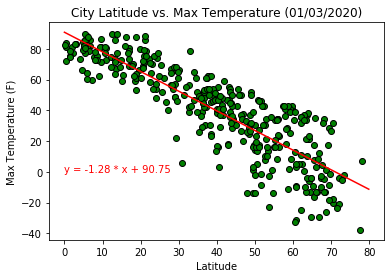

In [78]:
m = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Max Temp"]).slope
b = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Max Temp"]).intercept
x_values = [x for x in np.arange(0, 80, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] > 0]["Lat"], y = weather_df[weather_df["Lat"] > 0]["Max Temp"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(fname = "LatvsMaxTempNH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
rsquared= float(linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Max Temp"]).rvalue)  ** 2
print(f"The r-squared value is {rsquared}")
plt.text(x=0, y=0, s= f"y = {m} * x + {b}", c="red")

## Positive latitudes have a clear negative correlation with max temperature at this time of year. About 74% of the temperature variations are due simply to latitude according to r^2 value

The r-squared value is 0.1919285430093401


Text(-20, 40, 'y = 0.35 * x + 83.30')

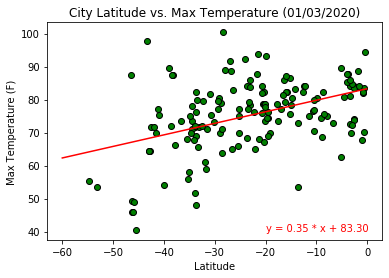

In [80]:
m = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Max Temp"]).slope
b = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Max Temp"]).intercept
x_values = [x for x in np.arange(-60, 0, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] < 0]["Lat"], y = weather_df[weather_df["Lat"] < 0]["Max Temp"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Max Temperature (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig(fname = "LatvsMaxTempSH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
rsquared = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Max Temp"]).rvalue ** 2
print(f"The r-squared value is {rsquared}")
plt.text(x=-20, y=40, s= f"y = {m} * x + {b}", c="red")

## For negative latitudes, the greater the latitude, the greater the max temperature (latitude and temp positively correlated). r^2 indicates latitude has much less of an effect on temperature in negative latitudes (for this time of year at least)

The r-squared value is 0.1884631587374975


Text(50, 10, 'y = 0.45 * x + 55.57')

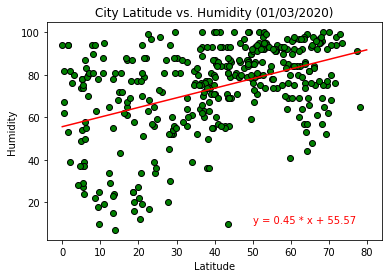

In [81]:
m = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Humidity"]).slope
b = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Humidity"]).intercept
x_values = [x for x in np.arange(0, 80, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] > 0]["Lat"], y = weather_df[weather_df["Lat"] > 0]["Humidity"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Humidity (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig(fname = "LatvsHumidityNH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
rsquared = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Humidity"]).rvalue ** 2
print(f"The r-squared value is {rsquared}")
plt.text(x=50, y=10, s= f"y = {m} * x + {b}", c="red")

## Humidity is positively correlated with latitude for positive latitudes. 

The r-squared value is 0.1884631587374975


Text(-20, 10, 'y = 0.52 * x + 80.45')

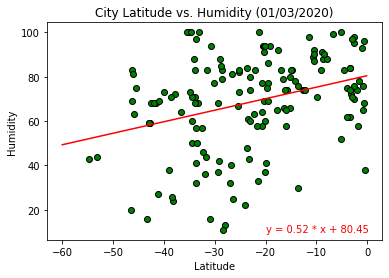

In [82]:
m = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Humidity"]).slope
b = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Humidity"]).intercept
x_values = [x for x in np.arange(-60, 0, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] < 0]["Lat"], y = weather_df[weather_df["Lat"] < 0]["Humidity"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Humidity (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig(fname = "LatvsHumiditySH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Humidity"]).rvalue ** 2
print(f"The r-squared value is {rsquared}")
plt.text(x=-20, y=10, s= f"y = {m} * x + {b}", c="red")

## Humidity is positively correlated with negative latitudes as well.

The r-squared value is 0.20542854868213847


Text(50, 10, 'y = 0.38 * x + 40.16')

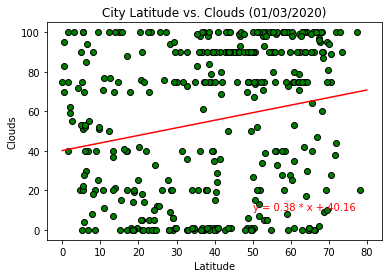

In [83]:
m = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Clouds"]).slope
b = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Clouds"]).intercept
x_values = [x for x in np.arange(0, 80, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] > 0]["Lat"], y = weather_df[weather_df["Lat"] > 0]["Clouds"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Clouds (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig(fname = "LatvsCloudsNH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
rsquared = linregress(weather_df[weather_df["Lat"] > 0]["Lat"], weather_df[weather_df["Lat"] > 0]["Clouds"]).rvalue
print(f"The r-squared value is {rsquared}")
plt.text(x=50, y=10, s= f"y = {m} * x + {b}", c="red")

## Cloudiness is positively correlated with latitude

The r-squared value is 0.41018011914591185


Text(-20, 10, 'y = 1.16 * x + 77.95')

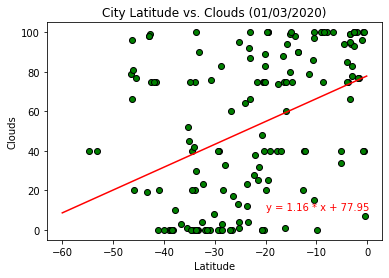

In [84]:
m = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Clouds"]).slope
b = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Clouds"]).intercept
x_values = [x for x in np.arange(-60, 0, 0.1)]
y_values = [m * x + b for x in x_values]
plt.scatter(x = weather_df[weather_df["Lat"] < 0]["Lat"], y = weather_df[weather_df["Lat"] < 0]["Clouds"], c="green", edgecolors = "black")
plt.title("City Latitude vs. Clouds (01/03/2020)")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig(fname = "LatvsCloudsSH.png")
plt.plot(x_values, y_values, c="red")
m = "%.2f" % float(m)
b = "%.2f" % float(b)
rsquared = linregress(weather_df[weather_df["Lat"] < 0]["Lat"], weather_df[weather_df["Lat"] < 0]["Clouds"]).rvalue
print(f"The r-squared value is {rsquared}")
plt.text(x=-20, y=10, s= f"y = {m} * x + {b}", c="red")

## Cloudiness is positively correlated with latitude in the southern hemisphere. This relationship is stronger than in the northern hemisphere.